# import

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import StandardScaler 


# result

all the data

Accuracy: 82.75%

 Training Accuracy score: 0.8154362416107382
Testing Accuracy score: 0.8274706867671692
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.62      0.74       239
         1.0       0.79      0.97      0.87       358

    accuracy                           0.83       597
   macro avg       0.86      0.79      0.81       597
weighted avg       0.85      0.83      0.82       597



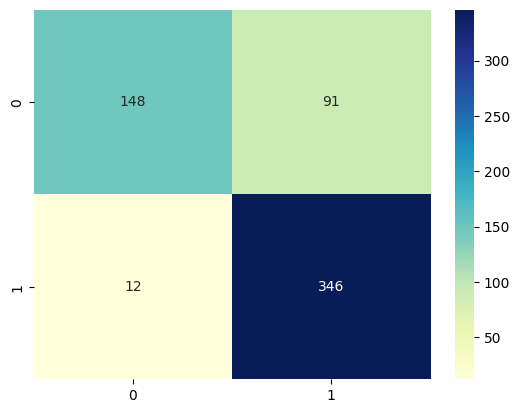

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/cleandata.csv')
# tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
# x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf= LogisticRegression(random_state=42,solver="liblinear")
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

- random undersimpling

Accuracy: 80.13%

 Training Accuracy score: 0.7986401673640168
Testing Accuracy score: 0.801255230125523
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.65      0.77       239
         1.0       0.73      0.95      0.83       239

    accuracy                           0.80       478
   macro avg       0.83      0.80      0.80       478
weighted avg       0.83      0.80      0.80       478



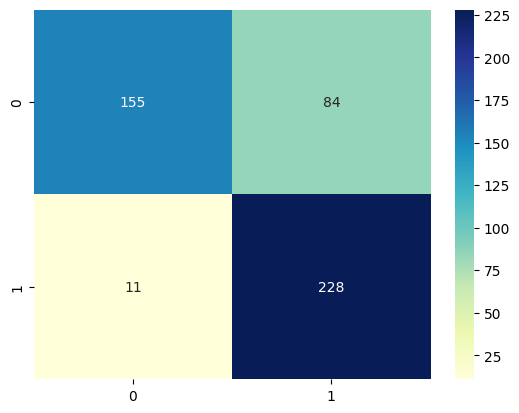

In [15]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- random undersimpling + StandardScaler

Accuracy: 77.41%

 Training Accuracy score: 0.7730125523012552
Testing Accuracy score: 0.7740585774058577
classification_report 
               precision    recall  f1-score   support

         0.0       0.84      0.67      0.75       239
         1.0       0.73      0.87      0.79       239

    accuracy                           0.77       478
   macro avg       0.79      0.77      0.77       478
weighted avg       0.79      0.77      0.77       478



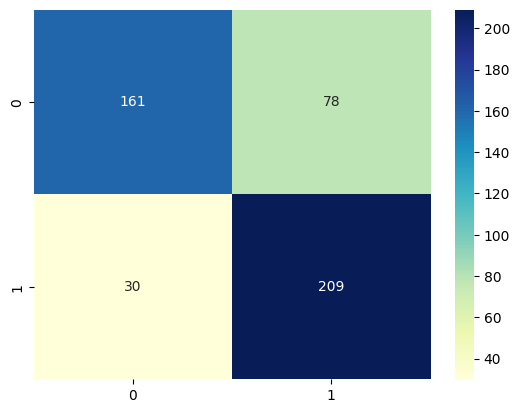

In [26]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 84.17%

 Training Accuracy score: 0.8367786391042205
Testing Accuracy score: 0.8416523235800344
classification_report 
               precision    recall  f1-score   support

         0.0       0.98      0.63      0.77       239
         1.0       0.79      0.99      0.88       342

    accuracy                           0.84       581
   macro avg       0.89      0.81      0.82       581
weighted avg       0.87      0.84      0.83       581



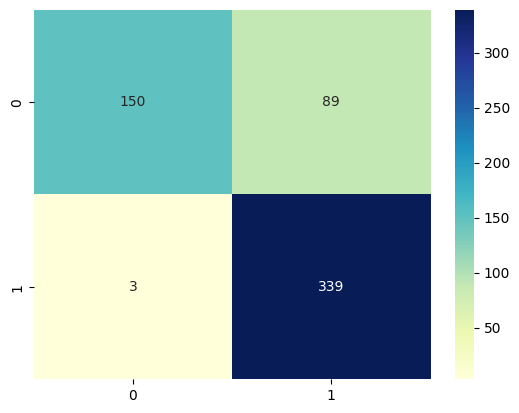

In [17]:
import numpy as np # linear algebra
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks

df = pd.read_csv('./Data/cleandata.csv')

tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

tomlink + random undersimpling

Accuracy: 84.17%

 Training Accuracy score: 0.8367786391042205
Testing Accuracy score: 0.8416523235800344
classification_report 
               precision    recall  f1-score   support

         0.0       0.98      0.63      0.77       239
         1.0       0.79      0.99      0.88       342

    accuracy                           0.84       581
   macro avg       0.89      0.81      0.82       581
weighted avg       0.87      0.84      0.83       581



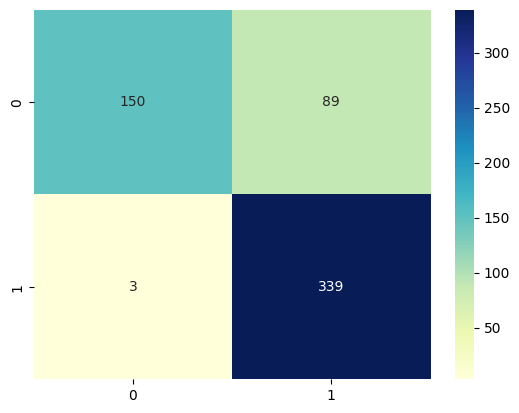

In [18]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import Pipeline
df = pd.read_csv('./Data/cleandata.csv')
tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x, y = tl.fit_resample(x, y)
# Convert the list to a DataFrame
y = pd.DataFrame({'IsABot': y})

# Concatenate the two DataFrames
data = pd.concat([x, y], axis=1)
df1=data[data.IsABot== 1].head(11543)
df2=data[data.IsABot== 0].head(11543)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

-oversimpling

Accuracy: 82.52%

 Training Accuracy score: 0.8134406720336017
Testing Accuracy score: 0.8251748251748252
classification_report 
               precision    recall  f1-score   support

         0.0       0.95      0.69      0.80       358
         1.0       0.75      0.96      0.85       357

    accuracy                           0.83       715
   macro avg       0.85      0.83      0.82       715
weighted avg       0.85      0.83      0.82       715



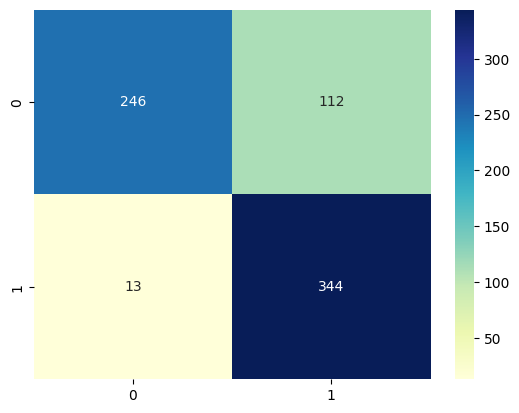

In [19]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/cleandata.csv')
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with features selection

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]




- random undersimpling 

Accuracy: 80.13%

 Training Accuracy score: 0.7986401673640168
Testing Accuracy score: 0.801255230125523
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.65      0.77       239
         1.0       0.73      0.95      0.83       239

    accuracy                           0.80       478
   macro avg       0.83      0.80      0.80       478
weighted avg       0.83      0.80      0.80       478



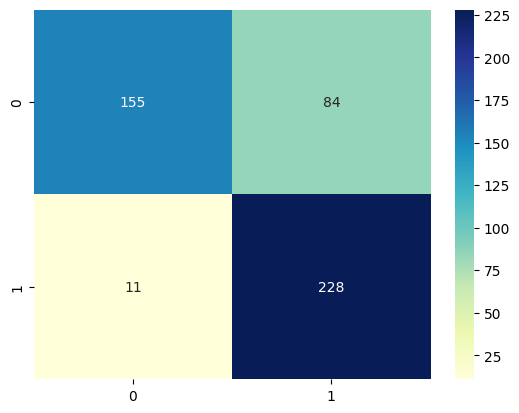

In [21]:
df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- oversimpling

Accuracy: 82.52%

 Training Accuracy score: 0.8134406720336017
Testing Accuracy score: 0.8251748251748252
classification_report 
               precision    recall  f1-score   support

         0.0       0.95      0.69      0.80       358
         1.0       0.75      0.96      0.85       357

    accuracy                           0.83       715
   macro avg       0.85      0.83      0.82       715
weighted avg       0.85      0.83      0.82       715



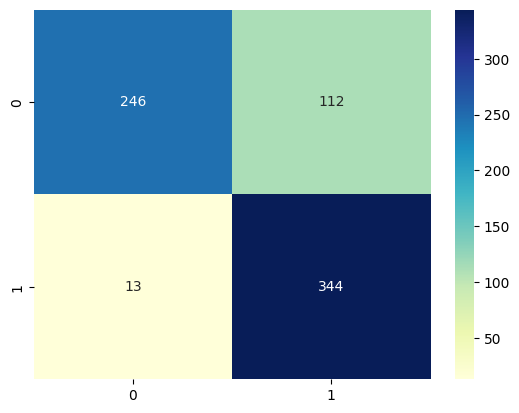

In [22]:
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
  
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 84.17%

 Training Accuracy score: 0.8367786391042205
Testing Accuracy score: 0.8416523235800344
classification_report 
               precision    recall  f1-score   support

         0.0       0.98      0.63      0.77       239
         1.0       0.79      0.99      0.88       342

    accuracy                           0.84       581
   macro avg       0.89      0.81      0.82       581
weighted avg       0.87      0.84      0.83       581



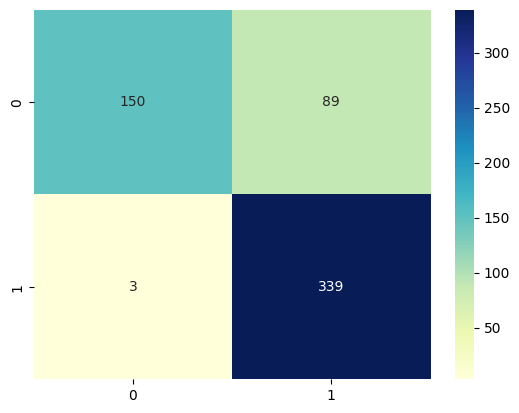

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf = Pipeline([
   
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# hyperparametre


In [25]:
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import TomekLinks
data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]

x=data1.iloc[:, :-1]
y = data1.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
# Create a logistic regression pipeline with StandardScaler
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42,max_iter=10000))
])

# Define the hyperparameters to search
param_grid = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=3)
grid_search.fit(x ,y)

grid_search.best_params_

d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\d

{'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

Accuracy: 83.30%

 Training Accuracy score: 0.8156761412575366
Testing Accuracy score: 0.8330464716006885
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.64      0.76       239
         1.0       0.80      0.96      0.87       342

    accuracy                           0.83       581
   macro avg       0.86      0.80      0.82       581
weighted avg       0.85      0.83      0.83       581



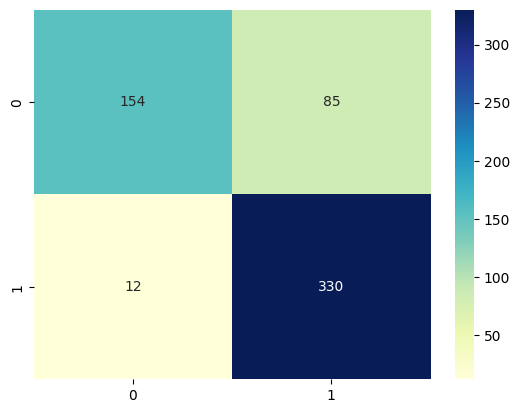

In [28]:
{'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]

x=data1.iloc[:, :-1]
y = data1.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    # ('scaler', StandardScaler()), # Standardizing the data
   
    ('rf',  LogisticRegression(random_state=42,solver="liblinear",penalty='l1',C=100,max_iter=1000)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#  cross validation

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]
x=data1.iloc[:, :-1]
y = data1.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf= LogisticRegression(random_state=42,solver="liblinear")
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.8232717146581348 /84

Average CV Score:  0.8232717146581348
